# Linear Regression

### Import Libraries


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Import dataset

In [28]:
data=pd.read_csv(r'D:\Intershipss\Ai nd Ml\Housing.csv')

In [29]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### Preprocessing

In [30]:
data_encoded=data.copy()

In [31]:
binary_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for col in binary_cols:
    data_encoded[col] = data_encoded[col].map({"yes":1, "no":0})


In [32]:
data_encoded = pd.get_dummies(data_encoded, columns=["furnishingstatus"], drop_first=True)


In [33]:
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [34]:
X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model 

In [37]:
model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)

MAE: 970043.403920164
MSE: 1754318687330.664
R²: 0.6529242642153184


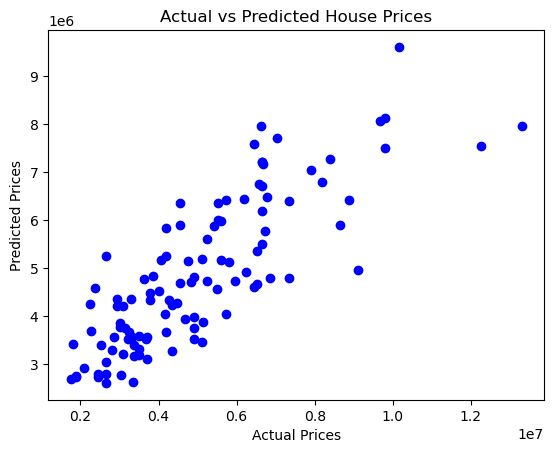

In [45]:
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()